In [39]:
# imports
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [40]:
# Variables
RANDOM_STATE = 42
TEST_SIZE = 0.25
TARGET_FEATURE = 'Label'
K_SPLIT = 5

kf = KFold(n_splits=K_SPLIT, shuffle=True, random_state=RANDOM_STATE)

scoring = {'accuracy': 'accuracy','precision_macro': 'precision','recall_macro': 'recall','f1_macro': 'f1','roc_auc_ovr': 'roc_auc'}

In [41]:
# Load the data
df_train = pd.read_csv('data/hand_gesture_train.csv')
df_test = pd.read_csv('data/hand_gesture_test.csv')

# Split the data into X and y
train_X, test_X, train_y, test_y = train_test_split(df_train.drop(TARGET_FEATURE, axis=1), df_train[TARGET_FEATURE], test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [43]:
# Define model pipelines
model = DecisionTreeClassifier(random_state=RANDOM_STATE)

In [44]:
# Hypertune using gridSearchCV
hyperparameters = {
    'max_depth': [2, 3, 4, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 0.1, 0.2, 0.3, 0.4, 0.5],
    'min_samples_leaf': [1, 2, 5, 10, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random']
}

model = GridSearchCV(model, hyperparameters, cv=K_SPLIT, n_jobs=-1)

try:
    model.fit(train_X, train_y)
except ValueError as e:
    print(f"Error in fitting: {e}")


print(f"Best parameters: {model.best_params_}")
print(f"Best score: {model.best_score_}")



Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Best score: 0.9597701149425287


c:\Users\Timoy\anaconda3\envs\MINOR\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [45]:
# Validate the model using cross validation
# Perform KFold cross-validation on the validation set
for score in scoring:
    try:
        scores = cross_val_score(model, test_X, test_y, cv=kf, scoring=score)
        print(f'____{score.split("_")[0]}___________________________________________')
        print(f'Cross-validation {score.split("_")[0]} on validation set: {scores}')
        print(f'{score.split("_")[0]} mean cross-validation score on validation set: {scores.mean():.2f}')
        print(f'{score.split("_")[0]} standard deviation on validation set: {scores.std():.2f}')
    except ValueError as e:
        print(f"Error in cross-validation: {e}")
print("\n\n")



c:\Users\Timoy\anaconda3\envs\MINOR\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


____accuracy___________________________________________
Cross-validation accuracy on validation set: [1.  1.  0.8 0.9 0.7]
accuracy mean cross-validation score on validation set: 0.88
accuracy standard deviation on validation set: 0.12


KeyboardInterrupt: 

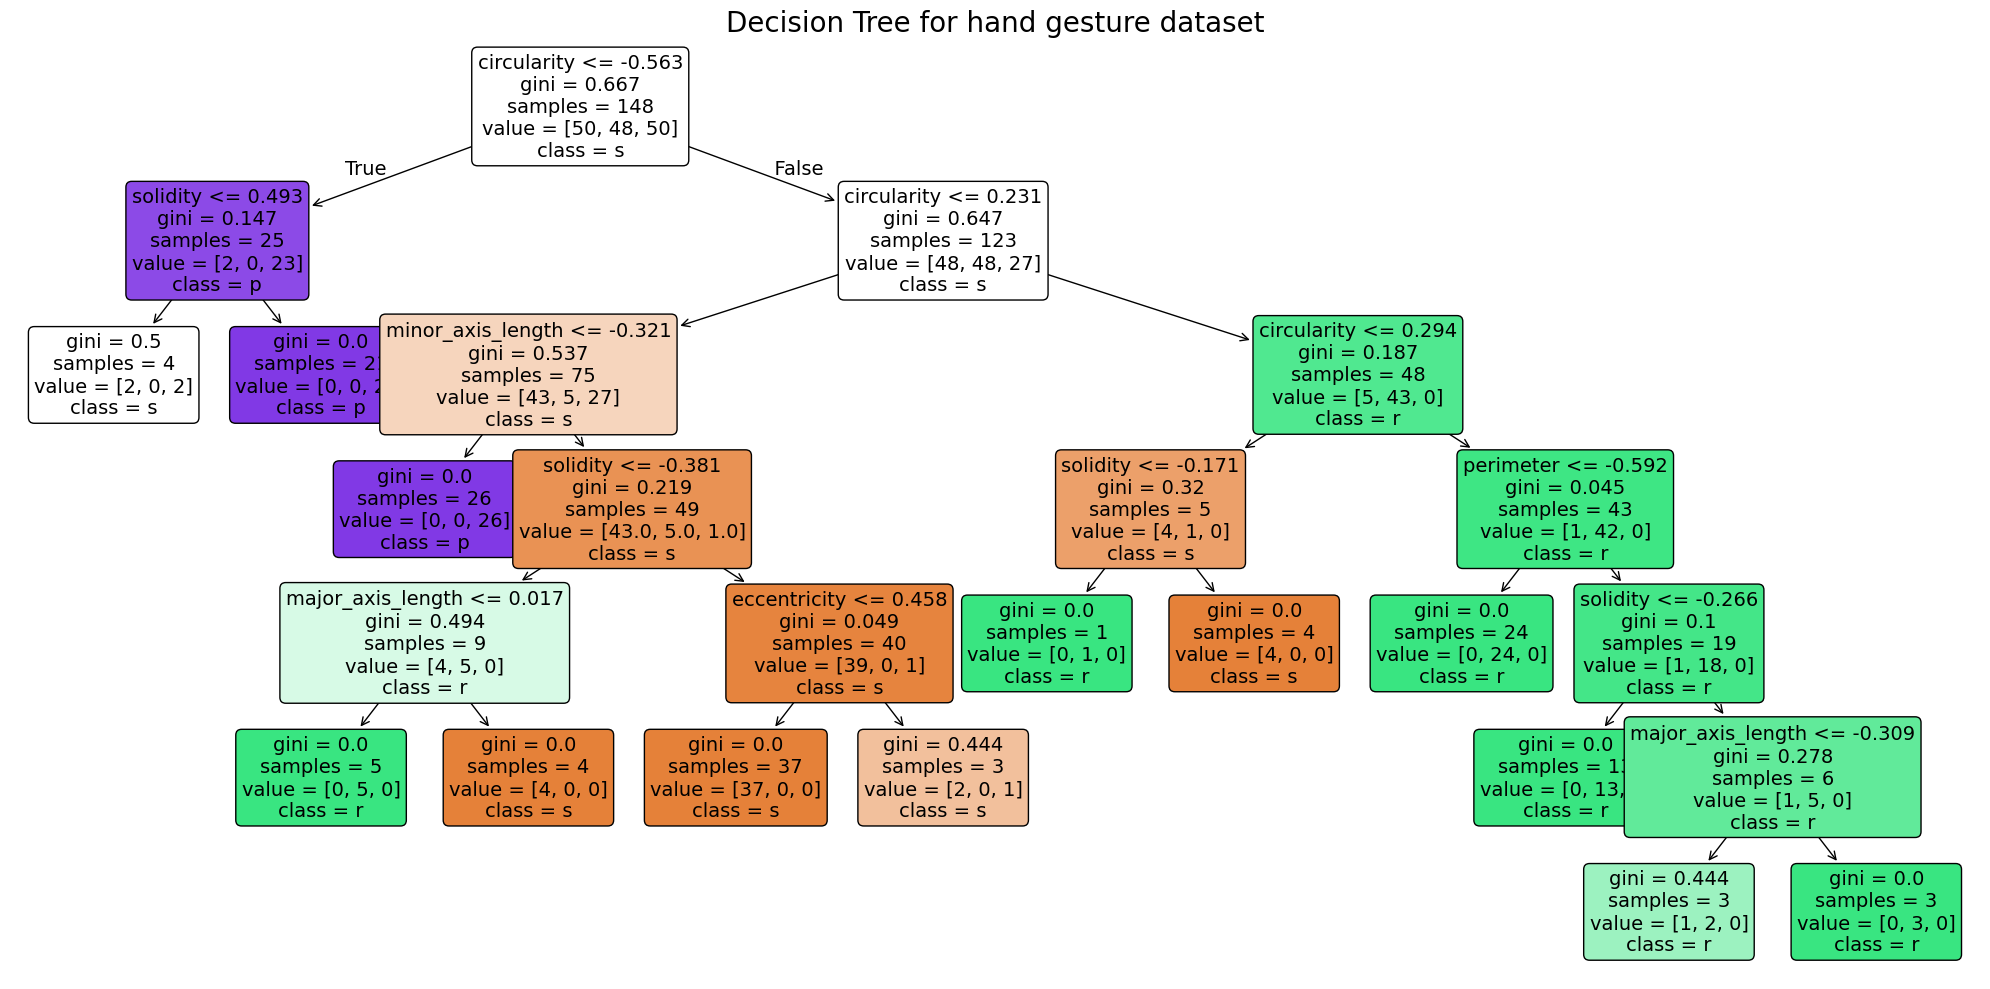

In [18]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(model.best_estimator_, 
               feature_names=test_X.columns,
               class_names=test_y.unique().astype(str),
               filled=True, 
               rounded=True, 
               fontsize=14)
plt.title("Decision Tree for hand gesture dataset", fontsize=20)
plt.tight_layout()
plt.show()

In [20]:
# Test the model on the test set
y_pred = model.predict(df_test.drop(TARGET_FEATURE, axis=1))
print(f"Accuracy: {accuracy_score(df_test[TARGET_FEATURE], y_pred)}")
print(f"Precision: {precision_score(df_test[TARGET_FEATURE], y_pred, average='macro')}")
print(f"Recall: {recall_score(df_test[TARGET_FEATURE], y_pred, average='macro')}")
print(f"Confusion Matrix: \n{confusion_matrix(df_test[TARGET_FEATURE], y_pred)}")
print(f"Classification Report: \n{classification_report(df_test[TARGET_FEATURE], y_pred)}")
print("\n\n")

Accuracy: 0.9411764705882353
Precision: 0.9444444444444443
Recall: 0.9212962962962963
Confusion Matrix: 
[[16  2  0]
 [ 0 34  0]
 [ 2  0 14]]
Classification Report: 
              precision    recall  f1-score   support

           p       0.89      0.89      0.89        18
           r       0.94      1.00      0.97        34
           s       1.00      0.88      0.93        16

    accuracy                           0.94        68
   macro avg       0.94      0.92      0.93        68
weighted avg       0.94      0.94      0.94        68






In [22]:
print(df_train.dtypes)  # Check if data types are correct
print(df_train.isnull().sum())  # To see how many NaN values are in each column


perimeter            float64
solidity             float64
circularity          float64
eccentricity         float64
major_axis_length    float64
minor_axis_length    float64
Label                 object
dtype: object
perimeter            0
solidity             0
circularity          0
eccentricity         0
major_axis_length    0
minor_axis_length    0
Label                0
dtype: int64
